In [2]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=2c7e5b664fec1074947dff9b77f57e257f3ca63f9f7905081582d2bf0d0fbe21
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


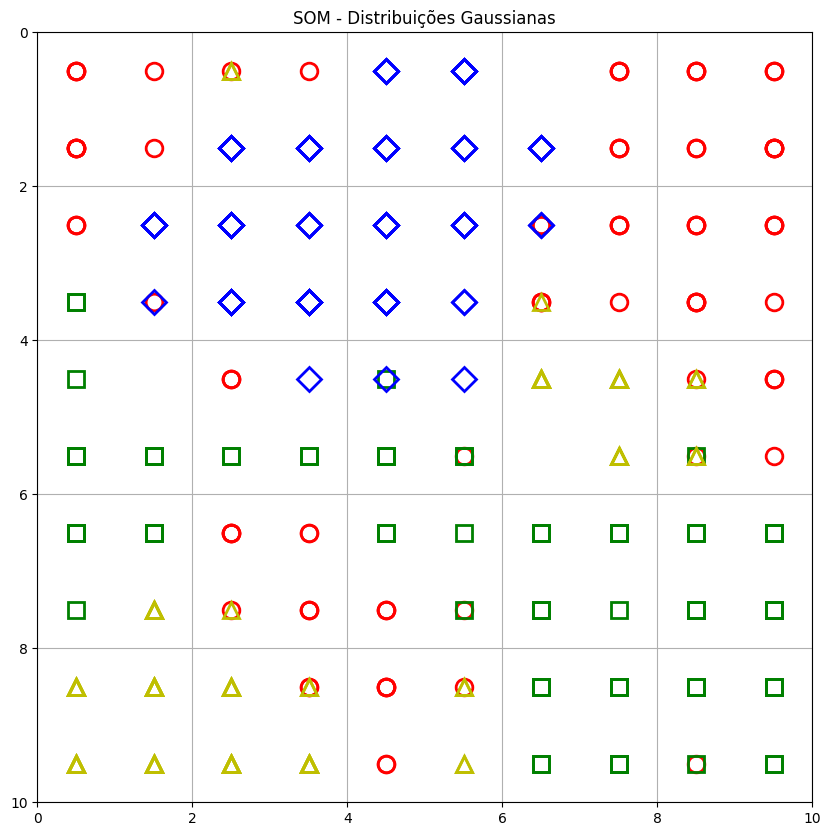

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Definindo as médias das distribuições
m1 = np.array([0,0,0,0,0,0,0,0])
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])

# Gerando os dados
np.random.seed(0)
data1 = np.random.randn(100, 8) + m1
data2 = np.random.randn(100, 8) + m2
data3 = np.random.randn(100, 8) + m3
data4 = np.random.randn(100, 8) + m4

# Concatenando todos os dados
data = np.concatenate((data1, data2, data3, data4))

# Inicializando e treinando o SOM
som = MiniSom(x=10, y=10, input_len=8, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 1000)

# Plotando o SOM
plt.figure(figsize=(10, 10))

colors = ['r', 'g', 'b', 'y']
markers = ['o', 's', 'D', '^']
data_sets = [data1, data2, data3, data4]

for cnt, data_set in enumerate(data_sets):
    for x in data_set:
        w = som.winner(x)
        plt.plot(w[0]+.5, w[1]+.5, markers[cnt], markerfacecolor='None',
                 markeredgecolor=colors[cnt], markersize=12, markeredgewidth=2)

plt.title('SOM - Distribuições Gaussianas')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.gca().invert_yaxis()
plt.grid()
plt.show()

